In [166]:
#from urllib.request import urlopen
import spacy
from spacy.cli import link
from spacy.util import get_package_path
from gensim.models import LsiModel

model_name = "de_core_news_sm"
package_path = get_package_path(model_name)
link(model_name, model_name, force=True, model_path=package_path)
nlp = spacy.load("de_core_news_sm")

import operator
import numpy as np
import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import gensim
from gensim import corpora, models
from pprint import pprint
import seaborn as sns
import char_split
import pyLDAvis.gensim
pd.set_option('display.max_colwidth', 80)


✔ Linking successful
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\de_core_news_sm
-->
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\spacy\data\de_core_news_sm
You can now load the model via spacy.load('de_core_news_sm')


ModuleNotFoundError: No module named 'char_split'

In [120]:
newdf= pd.read_csv(r"../out/Polizeiberichte_transformed.csv", sep=";", encoding="UTF-8")
newdf.drop_duplicates()

,Timestamp,Ueberschrift,Hauptartikel,Link,Datum,Ort,Sekundaerer Ort,Author,Ueberschrift_clean,Ueberschrift_lem,...,Ueberschrift_split,Ueberschrift_clean2,Ueberschrift_lem2,Ueberschrift_lem_clean2,Ueberschrift_lem_clean_no_stop,Ueberschrift_kombi,Hauptartikel_clean,Hauptartikel_lem,Hauptartikel_lemm_clean,Hauptartikel_lem_clean_no_stop
0,2019-04-30 08:54:00,Lastwagenfahrer fährt auf Polizisten zu und versucht zu flüchten,(ka) Gestern Abend konnte ein Polizeibeamter auf der A5 in letzter Sekunde ...,https://www.presseportal.de/blaulicht/pm/4970/4257970,NaN,Bundesautobahn,NaN,ka,lastwagenfahrer fährt auf polizisten zu und versucht zu flüchten,lastwagenfahrer fahren auf polizisten zu und versuchen zu flüchten,...,Lastwagen Fahrer Ver Suchen,lastwagen fahrer ver suchen,lastwagen fahrer ver suchen,lastwagen fahrer ver suchen,lastwagen fahrer,lastwagen fahrer lastwagenfahrer fahren polizisten versuchen flüchten,ka gestern abend konnte ein polizeibeamter auf der a in letzter sekunde ...,ka gestern abend können einen polizeibeamter auf der a in letzt sekun...,ka gestern abend können einen polizeibeamter auf der a in letzt sekun...,polizeibeamter sekunde zufahrenden lastwagen wegspringen fahrer begehen unf...
1,2019-04-30 08:40:00,Bauarbeiter schwer verletzt,(em) Gestern Nachmittag (29.04.2019) wurde ein 35-jähriger Arbeiter auf ein...,https://www.presseportal.de/blaulicht/pm/4970/4257955,NaN,Bahnhofsviertel,NaN,em,bauarbeiter schwer verletzt,bauarbeiter schwer verletzen,...,Bau Arbeiter Sch Wer,bau arbeiter sch wer,bau arbeiter sch wer,bau arbeiter sch wer,bau arbeiter,bau arbeiter bauarbeiter schwer verletzen,em gestern nachmittag wurde ein jähriger arbeiter auf einer baustelle ...,em gestern nachmittag werden einen jährig arbeiter auf einer baust...,em gestern nachmittag werden einen jährig arbeiter auf einer baust...,arbeiter baustelle elbestraße schwer verletzen umbauarbeiten beschäftigen me...
2,2019-04-29 11:17:00,Fahrradcodieraktion zum Frühlingsfest,(ne)Das 6. Polizeirevier wird im Rahmen eines Frühlingsfestes vom Seniorenw...,https://www.presseportal.de/blaulicht/pm/4970/4256984,NaN,Bornheim,NaN,ne,fahrradcodieraktion zum frühlingsfest,fahrradcodieraktion zum frühlingsfest,...,Frühlings Fest,frühlings fest,frühlings fest,frühlings fest,frühlings fest,frühlings fest fahrradcodieraktion frühlingsfest,ne das polizeirevier wird im rahmen eines frühlingsfestes vom seniorenwo...,ne der polizeirevier werden im rahmen ein frühlingsfestes vom senioren...,ne der polizeirevier werden im rahmen ein frühlingsfestes vom senioren...,rahmen frühlingsfestes seniorenwohnheim paulinum fahrradcodierung durchfahr...
3,2019-04-29 11:12:00,-Jähriger verletzt Polizisten,(ka) Gestern Nachmittag leistete ein Mann im Terminal 1 heftigen Widerstand...,https://www.presseportal.de/blaulicht/pm/4970/4256973,NaN,Flughafen,NaN,ka,jähriger verletzt polizisten,jährig verletzen polizisten,...,,,,,NaN,verletzen polizisten,ka gestern nachmittag leistete ein mann im terminal heftigen widerstand...,ka gestern nachmittag leisten einen mann im terminal heftig widerste...,ka gestern nachmittag leisten einen mann im terminal heftig widerste...,leisten terminal heftig widerstehen verletzen beamten halle terminal rufen ...
4,2019-04-28 12:34:00,Versuchter Raub in Spielothek,"(fue) Am Sonntag, den 28. April 2019, gegen 01.50 Uhr, betrat eine zunächst...",https://www.presseportal.de/blaulicht/pm/4970/4256438,NaN,Nordend,NaN,fue,versuchter raub in spielothek,versucht raub in spielothek,...,Ver Sucht Raub,ver sucht raub,ver suchen raub,ver suchen raub,raub,raub versucht raub spielothek,fue am sonntag den april gegen uhr betrat eine zunächst unbekannt...,fue am sonntag der april gegen uhr betreten einen zunächst...,fue am sonntag der april gegen uhr betreten einen zunächst...,betreten unbekannt männliche person spielothek schwarzburgstraße anwesend a...
5,2019-04-26 14:51:00,Verkehrshinweise anlässlich des traditionellen Radrennens am . Mai,"(em) Auch dieses Jahr findet das Ra

In [115]:
newdf["Hauptartikel_lem_clean_no_stop"].isnull().sum()

0

In [118]:
newdf['Ueberschrift_kombi'].isnull().sum()

0

In [119]:
newdf["Author"].value_counts()

em     67
fue    64
ka     53
ne     35
mc     10
md      8
pe      7
me      5
hol     5
hs      3
ki      3
neu     1
Name: Author, dtype: int64

In [171]:
newdf['Timestamp'] =  pd.to_datetime(newdf['Timestamp'])
newdf['Hours'] = (newdf['Timestamp'].dt.minute + newdf['Timestamp'].dt.hour*60)/60
newdf['day'] = newdf['Timestamp'].dt.day
newdf['weekday'] = newdf['Timestamp'].dt.weekday

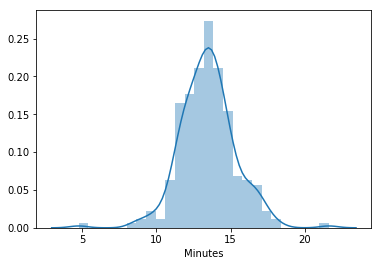

In [172]:
sns.distplot(newdf['Minutes'])

(0, 30)

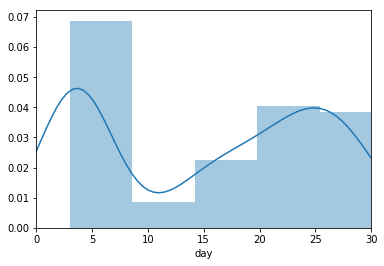

In [173]:
sns.distplot(newdf['day'])
plt.xlim(0, 30)

(0, 7)

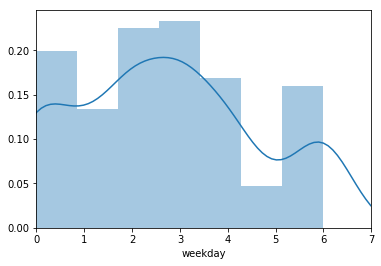

In [175]:
sns.distplot(newdf['weekday'])
plt.xlim(0, 7)

In [122]:
def getElement(Liste):
    return ' '.join(Liste)
newdf["Ueberschrift_kombi"] = newdf["Ueberschrift_kombi"].apply(lambda x: [item for item in x.split()])
newdf["Hauptartikel_lem_clean_no_stop"] = newdf["Hauptartikel_lem_clean_no_stop"].apply(lambda x: [item for item in x.split()])

In [124]:
# be sure to split sentence before feed into Dictionary
#dataset = [d.split() for d in dataset]

dataset = newdf["Hauptartikel_lem_clean_no_stop"]
dataset_head = newdf["Ueberschrift_kombi"]

vocab = gensim.corpora.Dictionary(dataset)
vocab_heads = gensim.corpora.Dictionary(dataset_head)

bow_corpus = [vocab.doc2bow(doc) for doc in dataset]
bow_corpus_heads = [vocab.doc2bow(doc) for doc in dataset_head]

tfidf = models.TfidfModel(bow_corpus)
tfidf_head = models.TfidfModel(bow_corpus_heads)

corpus_tfidf = tfidf[bow_corpus]
corpus_tfidf_head = tfidf[bow_corpus_heads]


data = newdf["Hauptartikel_lem_clean_no_stop"].apply(getElement)

In [126]:
def getMyTopic(row, Model):
    bow = vocab.doc2bow(row)
    Topic = max((Model[bow]), key= lambda x: x[1])
    return Topic[0]

def getMyTopic1(row, Model):
    bow = vocab.doc2bow(row)
    Topic = max((Model[bow]), key= lambda x: x[1])
    return Topic[1]


In [36]:
#Safe as Excel
#newdf.to_excel(r"C:\Users\Markus.Haftstein.ADASTRACORPNET\PycharmProjects\polizeiberichte_scraper\MYDF.xlsx")

In [127]:
ldamodel = LdaModel(corpus=bow_corpus, num_topics=7, id2word=vocab)
hdpmodel = HdpModel(corpus=bow_corpus, id2word=vocab)
lsimodel = LsiModel(corpus=corpus_tfidf, num_topics=7, id2word=vocab)
lsimodelUpdate = models.LsiModel(corpus_tfidf, id2word=vocab, num_topics=7)
lsimodelUpdate.add_documents(corpus_tfidf_head, decay=0.5)  # now LSI has been trained on tfidf_corpus + another_tfidf_corpus
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=vocab, passes=2, workers=4)


In [130]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]
lsitopics_update = [[word for word, prob in topic] for topicid, topic in lsimodelUpdate.show_topics(formatted=False)]
hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]
lda_model_tfidf_topics = [[word for word, prob in topic] for topicid, topic in lda_model_tfidf.show_topics(formatted=False)]


lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=newdf["Hauptartikel_lem_clean_no_stop"], dictionary=vocab, window_size=10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=newdf["Hauptartikel_lem_clean_no_stop"], dictionary=vocab, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=ldatopics, texts=newdf["Hauptartikel_lem_clean_no_stop"], dictionary=vocab, window_size=10).get_coherence()
lsi_coherence_Update = CoherenceModel(topics=lsitopics_update[:10], texts=newdf["Hauptartikel_lem_clean_no_stop"], dictionary=vocab, window_size=10).get_coherence()
lda_model_tfidf_coher = CoherenceModel(topics=lda_model_tfidf_topics, texts=newdf["Hauptartikel_lem_clean_no_stop"], dictionary=vocab, window_size=10).get_coherence()

In [131]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

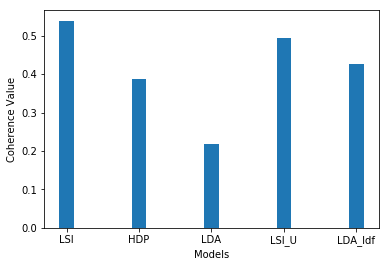

In [132]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence,lsi_coherence_Update,lda_model_tfidf_coher],
                   ['LSI', 'HDP', 'LDA', "LSI_U", "LDA_Idf"])

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, bow_corpus, vocab)

In [ ]:
newdf["Topic_LSI_Update"] = newdf["allWords"].apply(getMyTopic, args=[lsimodelUpdate])
newdf["Prob_LSI_Update"] = newdf["allWords"].apply(getMyTopic1,args=[lsimodelUpdate])
newdf["Topic_LSI"] = newdf["allWords"].apply(getMyTopic, args=[lsimodel])
newdf["Prob_LSI"] = newdf["allWords"].apply(getMyTopic1,args=[lsimodel])

In [ ]:
newdf[newdf['CleanHeadline'].str.contains("unfall")]

In [ ]:
newdf[newdf['CleanHeadline'].str.contains("brand")]

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
data = newdf["allWords"].apply(getElement)

In [ ]:
NUM_TOPICS = 10
 
vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
                             lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(data)
 
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_topics=NUM_TOPICS, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)
print(lda_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
# Build a Non-Negative Matrix Factorization Model
nmf_model = NMF(n_components=NUM_TOPICS)
nmf_Z = nmf_model.fit_transform(data_vectorized)
print(nmf_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
# Build a Latent Semantic Indexing Model
lsi_model = TruncatedSVD(n_components=NUM_TOPICS)
lsi_Z = lsi_model.fit_transform(data_vectorized)
print(lsi_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 

In [ ]:
bow_corpus

In [ ]:
Model1 =models.TfidfModel(corpus=bow_corpus, normalize=True)

In [ ]:
Model1.